In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
print('libraries imported!')

libraries imported!


In [2]:
file = open('./Data/SMSSpamCollection.txt')
data = file.readlines()  # line by line 
file.close()
print("No. of email message : ",len(data) )# list of  lines

No. of email message :  5574


In [3]:
print(data[2])

spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's



In [4]:
x = []   # email message 
y = []   # labels 
for line in data:
    splitted_data = line.split('\t')
    if len(splitted_data) == 2: 
        y.append(splitted_data[0]) 
        x.append(splitted_data[1].replace('\n',''))


In [5]:
len(x) ,len(y)

(5574, 5574)

In [6]:
df = pd.DataFrame({'email_messages':x,'labels':y})
df.head()

,email_messages,labels
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham


In [9]:
# pd.read_table('./Data/SMSSpamCollection.txt')

In [10]:
value_counts = df['labels'].value_counts()

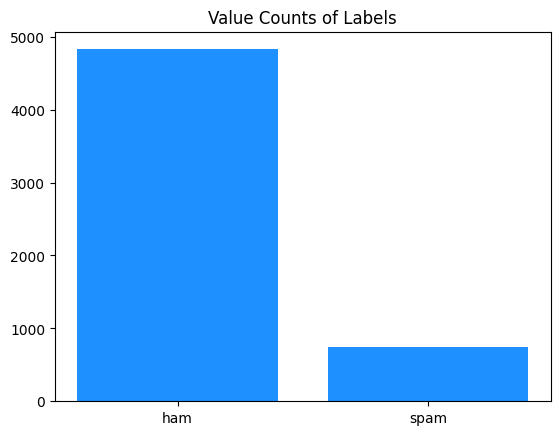

In [13]:
plt.bar(value_counts.index, value_counts.values, color='dodgerblue')
plt.title('Value Counts of Labels')
plt.show()

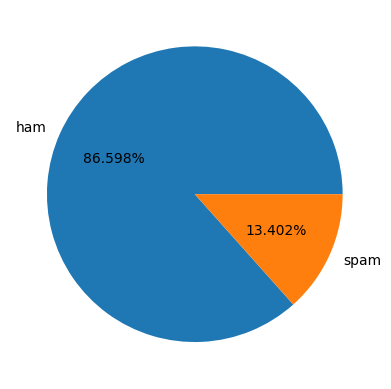

In [16]:
plt.pie(value_counts.values,labels=value_counts.index,autopct='%2.3f%%')
plt.show()

In [18]:
ham = df[df['labels']=='ham']
spam = df[df['labels']=='spam']


In [21]:
spam.shape 

(747, 2)

In [22]:
ham.shape 

(4827, 2)

In [32]:
HAM = ham.sample(1000)  # random sampling 

In [35]:
HAM.shape 

(1000, 2)

In [40]:
balance_df = pd.concat([spam,HAM])

In [42]:
value_counts = balance_df['labels'].value_counts()
value_counts

labels
ham     1000
spam     747
Name: count, dtype: int64

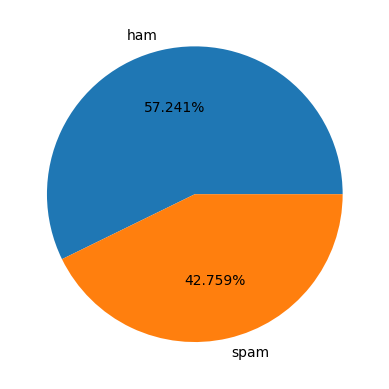

In [43]:
plt.pie(value_counts.values,labels=value_counts.index,autopct='%2.3f%%')
plt.show()

In [44]:
balance_df.head()

,email_messages,labels
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
5,FreeMsg Hey there darling it's been 3 week's n...,spam
8,WINNER!! As a valued network customer you have...,spam
9,Had your mobile 11 months or more? U R entitle...,spam
11,"SIX chances to win CASH! From 100 to 20,000 po...",spam


In [54]:
balance_df.reset_index(drop=True,inplace=True)  # new indexes 

In [60]:
import re  # regular expression  

In [62]:
balance_df['email_messages'][0]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [63]:
for i in range(len(balance_df)): 
    lower_message = balance_df['email_messages'][i].lower()
    clean_message = re.sub('[^a-zA-Z ]',"",lower_message)  # substitud  
    balance_df['email_messages'][i] = clean_message 
    

In [65]:
balance_df['email_messages'][0]

'free entry in  a wkly comp to win fa cup final tkts st may  text fa to  to receive entry questionstd txt ratetcs apply overs'

In [66]:
x  =  balance_df['email_messages'] 
y  =  balance_df['labels']

In [73]:
X = x.values  # changed into numpy array 

In [77]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer  
## to convert text data to numerical representation 

In [78]:
bow_obj =  CountVectorizer(max_features=1500,stop_words='english')

In [80]:
# from nltk.corpus import stopwords 

In [86]:
# len(stopwords.words('english')) 

In [88]:
x_transformed = bow_obj.fit_transform(X)
x_transformed

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 12627 stored elements and shape (1747, 1500)>

In [89]:
X.shape 

(1747,)

In [91]:
X2 = x_transformed.toarray() 


In [ ]:
[25,12,36,52,89]  #  list 
array 
tuple 
set 

In [ ]:
series < numpy array 